In [306]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.ensemble import GradientBoostingClassifier

from models.loader import *
from models.classifiers import *

In [338]:
SEED = 4618
train_sizes = 1 - np.array([0.95, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2])

### Gradient Boosted Model

We run the model 15 times.

The randomness comes from the load_data function: in particular, which subset of the positive class is used. 
We keep this proportion at 0.05, but randomize the sample that is chosen. This is meant to simulate the
differences in quality of data that might occur.

The mean of the result (scores) should give an idea of the (average) rate at which performance improves.

In [391]:
gb_model = GradientBoostingClassifier(
    random_state = SEED, 
    subsample = 0.5)

# Detecting label 15 
#(can change this to anything between 13 and 22, inclusive -- the subcategories within Mechanical & Civil Engineering)
label = 15
scores, X, y, vocab = simulate(
    model = gb_model, 
    label = label, 
    target_p = 0.05, 
    train_sizes = train_sizes, 
    n = 15, 
    random_state = SEED)

##### Explore Vocabulary

In [348]:
def print_sample_vocab(cl):
    if cl == 'pos':
        idx = random.sample(list(y[y==1].index), 1)[0]
    elif cl == 'neg':
        idx = random.sample(list(y[y==0].index), 1)[0]
    else:
        pass
    
    words = np.array(vocab)[np.array(X[idx].todense() != 0)[0]]
    print(' '.join(words))

In [349]:
# Example: documents in class 15
print_sample_vocab(cl='pos')
print('----------------------')
print_sample_vocab(cl='pos')
print('----------------------')
print_sample_vocab(cl='pos')
print('----------------------')

addit appli averag benefici densiti differ drive effect effici electr high improv insert instal iron limit loss machin magnet overal paper perform perman posit power rotor size space studi synchron systemat torqu total variabl vehicl
----------------------
adjust broad capabl chang charg compar condit control copyright crown dem demonstr densiti design differ difficult draw dynam elsevi energi exist expens experiment explor extern flow friction gain improv infer insid insight knowledg level look machin make materi measur method new observ offer oper optimis paper particl perform power predict process properti provid publish rang reserv right size speed togeth typic understand use variat
----------------------
abil achiev activ assembl base calcul characterist compar conduct cultiv curv design domain drive experi feed fish fix goal instal low machin meet new oper paper particl perform pond posit power practic problem requir result simul sinc solv sourc spread surfac valid water
--------

In [350]:
# Example: documents not in class 15
print_sample_vocab(cl='neg')
print('----------------------')
print_sample_vocab(cl='neg')
print('----------------------')
print_sample_vocab(cl='neg')
print('----------------------')

accur accuraci algorithm apertur appli better canopi capabl chang cm coeffici combin configur data densiti effect effici elsevi ensur equat error essenti estim evalu fast food forecast genet grain great illustr import invers length map microwav mode model monitor nation number oper paramet play potenti practic product propos prove radar reason region regress relat remot reserv result retriev rice right role scatter secur select sens simpl simul stabil studi synthet technolog various yield
----------------------
abund analysi associ bacteri basi basin challeng characterist china class close cluster communiti concentr control demonstr differ distribut domin ecolog effect environment fluctuat follow group hierarch high higher investig issu level lower main moder nitrogen occurr paramet phosphorus pollut proport provid ratio reflect relat respons restor result river sampl slight small spatial structur studi temperatur tempor theoret total tp trend urban vari variat water
------------------

In [351]:
n_docs = len(y)
n_pos = sum(y==1)
print("Total number of documents: {}".format(n_docs))
print("Number of documents in Class 15: {}".format(n_pos))

Total number of documents: 3814
Numer of documents in Class 15: 202


In [352]:
3888*0.2

777.6

##### Visualize

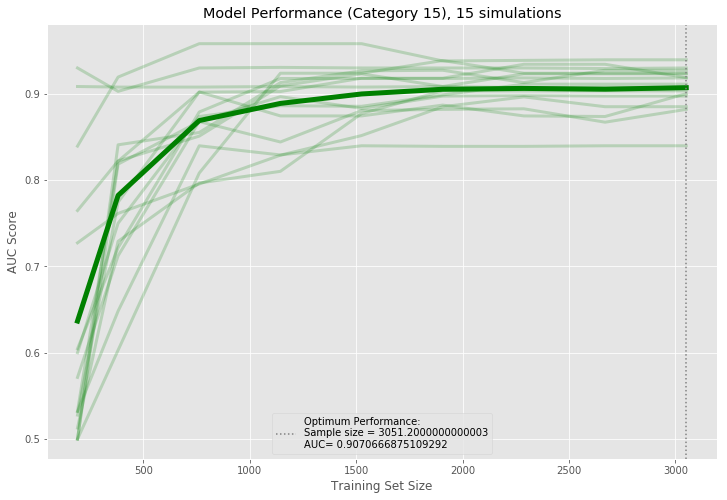

In [392]:

fig, ax = plt.subplots(figsize=(12, 8))

for iteration in scores:
    ax.plot(train_sizes*n_docs, iteration, alpha = 0.2, color = 'g', linewidth=3)

ax.plot(train_sizes*n_docs, np.mean(scores, axis=0), color = 'g', linewidth=5, )

optimum_idx = np.argmax(np.mean(scores, axis=0))
optimum = (train_sizes*n_docs)[optimum_idx]
opt_auc = np.mean(scores, axis = 0)[optimum_idx]
ax.axvline(
    x = optimum, 
    color = 'grey', 
    linestyle = ':', 
    label = 'Optimum Performance: \nSample size = {}\nAUC= {}'.format(optimum, opt_auc))

ax.set_xlabel('Training Set Size')
ax.set_ylabel('AUC Score')
ax.legend()
_=ax.set_title('Model Performance (Category {}), 15 simulations'.format(label))

In [393]:
fig.savefig('img/gb_simulation_{}.png'.format(label))